In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from difflib import SequenceMatcher
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import zscore

pd.set_option('display.max_columns', None)

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Nicholas Sky\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


# Exploratory Data Analysis (Before Cleaning)

In [2]:
churn = pd.read_excel(r"C:\Users\Nicholas Sky\Downloads\E Commerce Dataset.xlsx", sheet_name = "E Comm")
churn

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
churn.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
churn['PreferredPaymentMode'] = churn['PreferredPaymentMode'].replace(['CC', 'COD'], ['Credit Card', 'Cash on Delivery'])

In [6]:
churn.groupby(['Churn','SatisfactionScore'])[['CashbackAmount']].mean()

CashbackAmount
Churn SatisfactionScore                
0     1                      178.949709
      2                      179.613594
      3                      180.810597
      4                      180.942472
      5                      182.695687
1     1                      160.527612
      2                      164.483514
      3                      158.459863
      4                      162.127609
      5                      160.028030

In [7]:
churn.groupby(['Churn','Gender','PreferredLoginDevice'])[['SatisfactionScore']].mean()

SatisfactionScore
Churn Gender PreferredLoginDevice                   
0     Female Computer                       3.028000
             Mobile Phone                   3.045675
             Phone                          3.165312
      Male   Computer                       2.809877
             Mobile Phone                   2.994236
             Phone                          3.078498
1     Female Computer                       3.333333
             Mobile Phone                   3.335938
             Phone                          3.852273
      Male   Computer                       3.406250
             Mobile Phone                   3.331818
             Phone                          3.303191

In [8]:
churn.groupby(['Churn','Gender','PreferredPaymentMode'])[['CashbackAmount']].mean()

CashbackAmount
Churn Gender PreferredPaymentMode                
0     Female Cash on Delivery          187.632405
             Credit Card               179.195184
             Debit Card                181.846979
             E wallet                  189.406019
             UPI                       180.297193
      Male   Cash on Delivery          166.681316
             Credit Card               181.043655
             Debit Card                179.370286
             E wallet                  187.092164
             UPI                       179.474474
1     Female Cash on Delivery          166.964000
             Credit Card               156.398421
             Debit Card                150.503158
             E wallet                  184.130000
             UPI                       162.978000
      Male   Cash on Delivery          147.568636
             Credit Card               160.256136
             Debit Card                165.331373
             E wallet                  173.664000
             UPI                       143.675385

# Univariate Analysis

In [9]:
cat_var = churn.select_dtypes(include=['object']).columns.tolist()
num_var = churn.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variabel : ", cat_var)
print("Num Variabel : ", num_var)

Categorical Variabel :  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Num Variabel :  ['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


Calculate the percentage of ' PreferredLoginDevice ' variable 



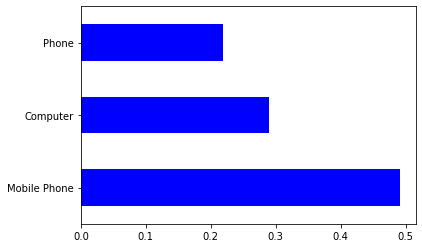


Calculate the percentage of ' PreferredPaymentMode ' variable 



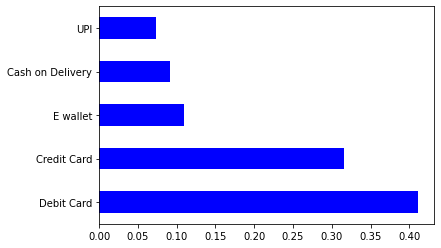


Calculate the percentage of ' Gender ' variable 



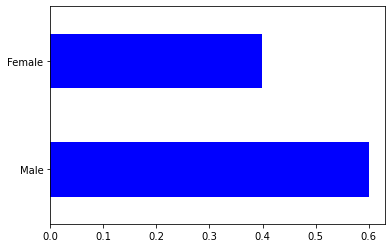


Calculate the percentage of ' PreferedOrderCat ' variable 



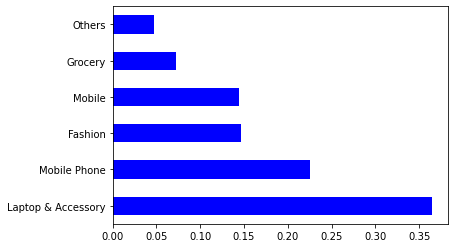


Calculate the percentage of ' MaritalStatus ' variable 



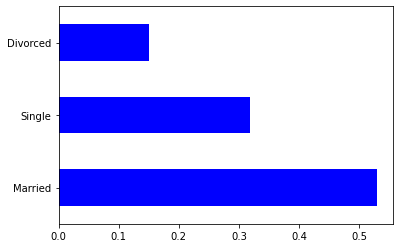

In [10]:
for i in cat_var:
    # Let's calculate the percentage of each category.
    churn[i].value_counts(normalize = True)
    print("Calculate the percentage of '",i,"' variable \n")
    #plot the bar graph of percentage job categories
    churn[i].value_counts(normalize = True).plot.barh(color = "blue")
    plt.show()
    print("="*30,"\n")

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


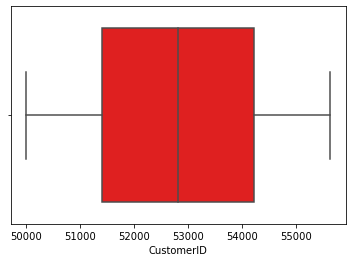

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


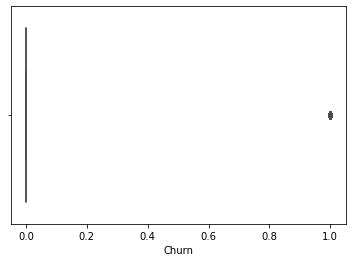

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


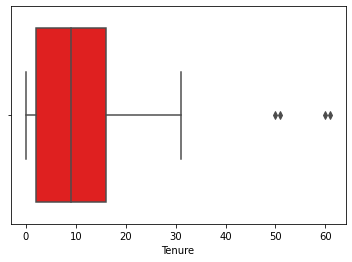

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


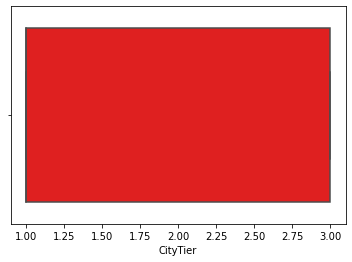

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


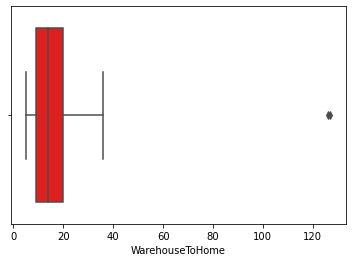

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


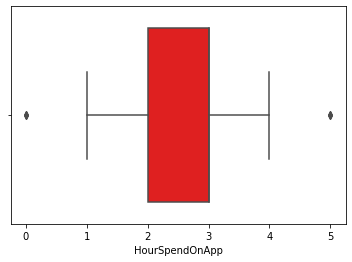

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


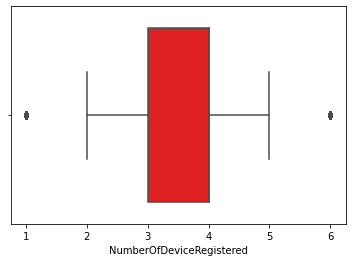

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


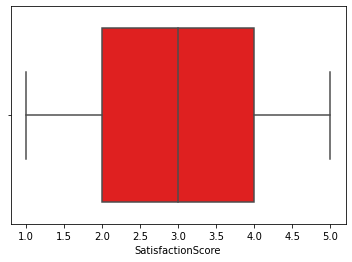

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


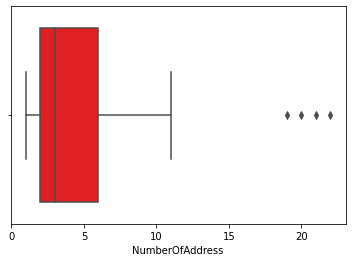

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


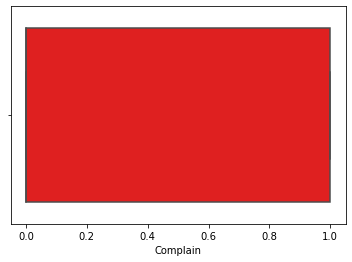

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


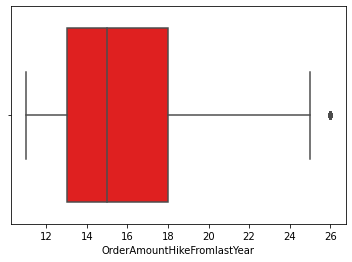

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


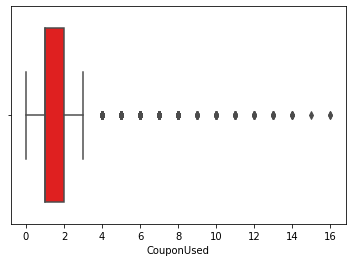

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


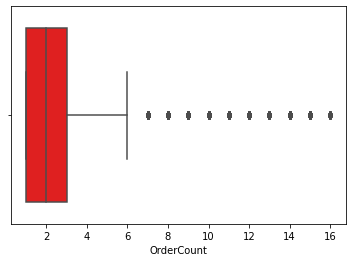

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


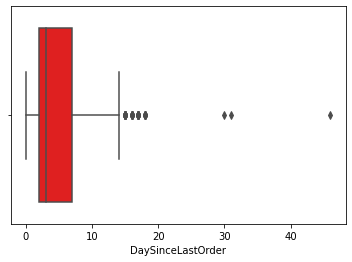

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


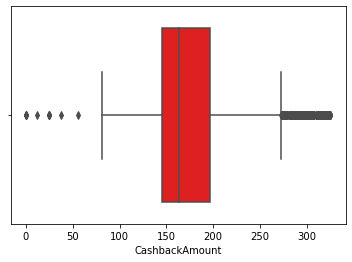

In [11]:
#Numerical Univariate Analysis

# boxplot
for i in range(len(num_var)):
    sns.boxplot(churn[num_var[i]], color = "red", orient = "h")
    plt.show()

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


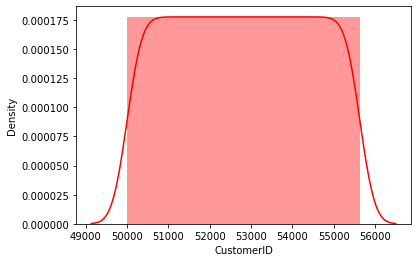

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


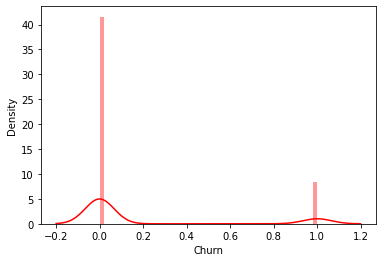

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


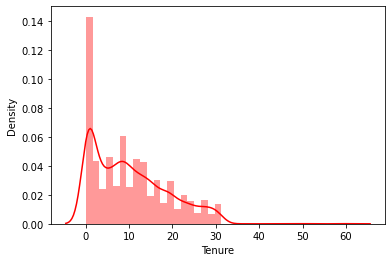

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


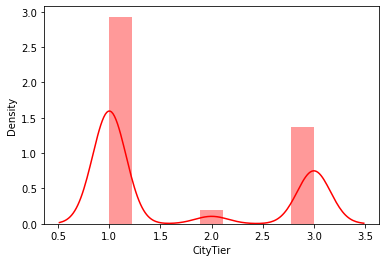

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


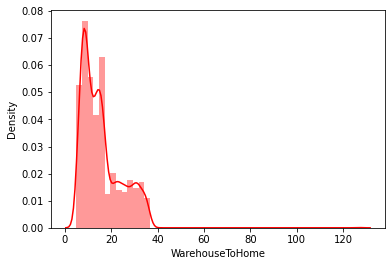

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


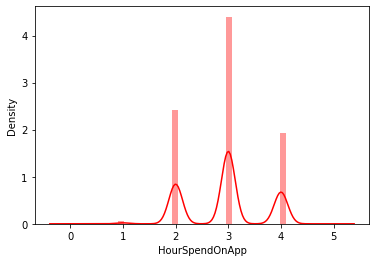

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


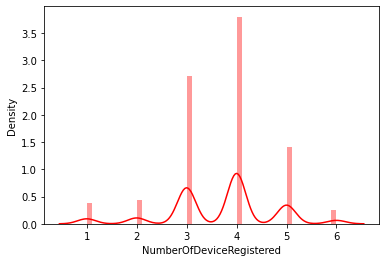

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


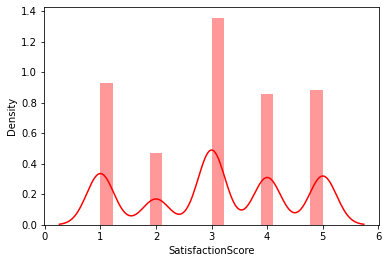

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


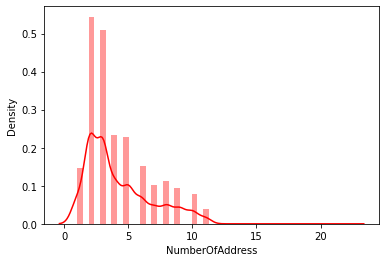

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


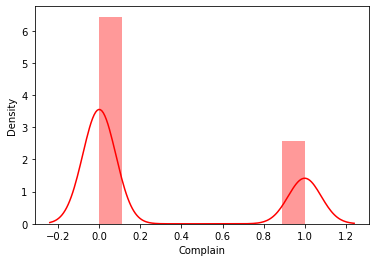

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


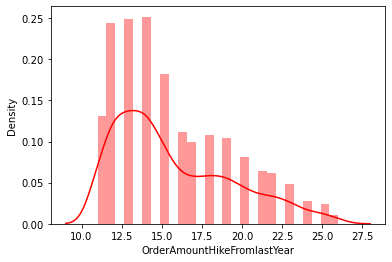

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


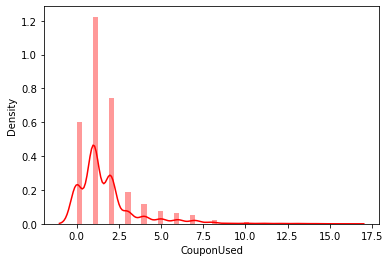

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


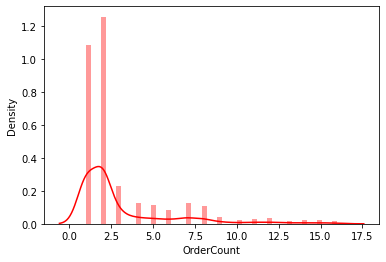

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


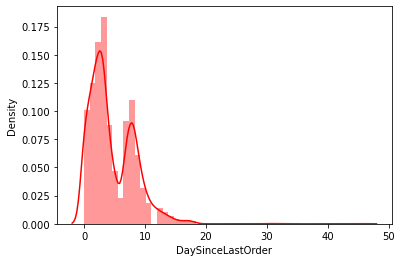

C:\Users\Nicholas Sky\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


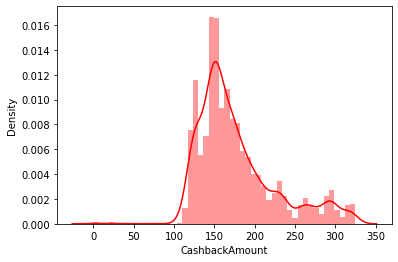

In [12]:
# dist plot
for i in range(len(num_var)):
    sns.distplot(churn[num_var[i]], color="red")
    plt.show()

# Bivariate Analysis

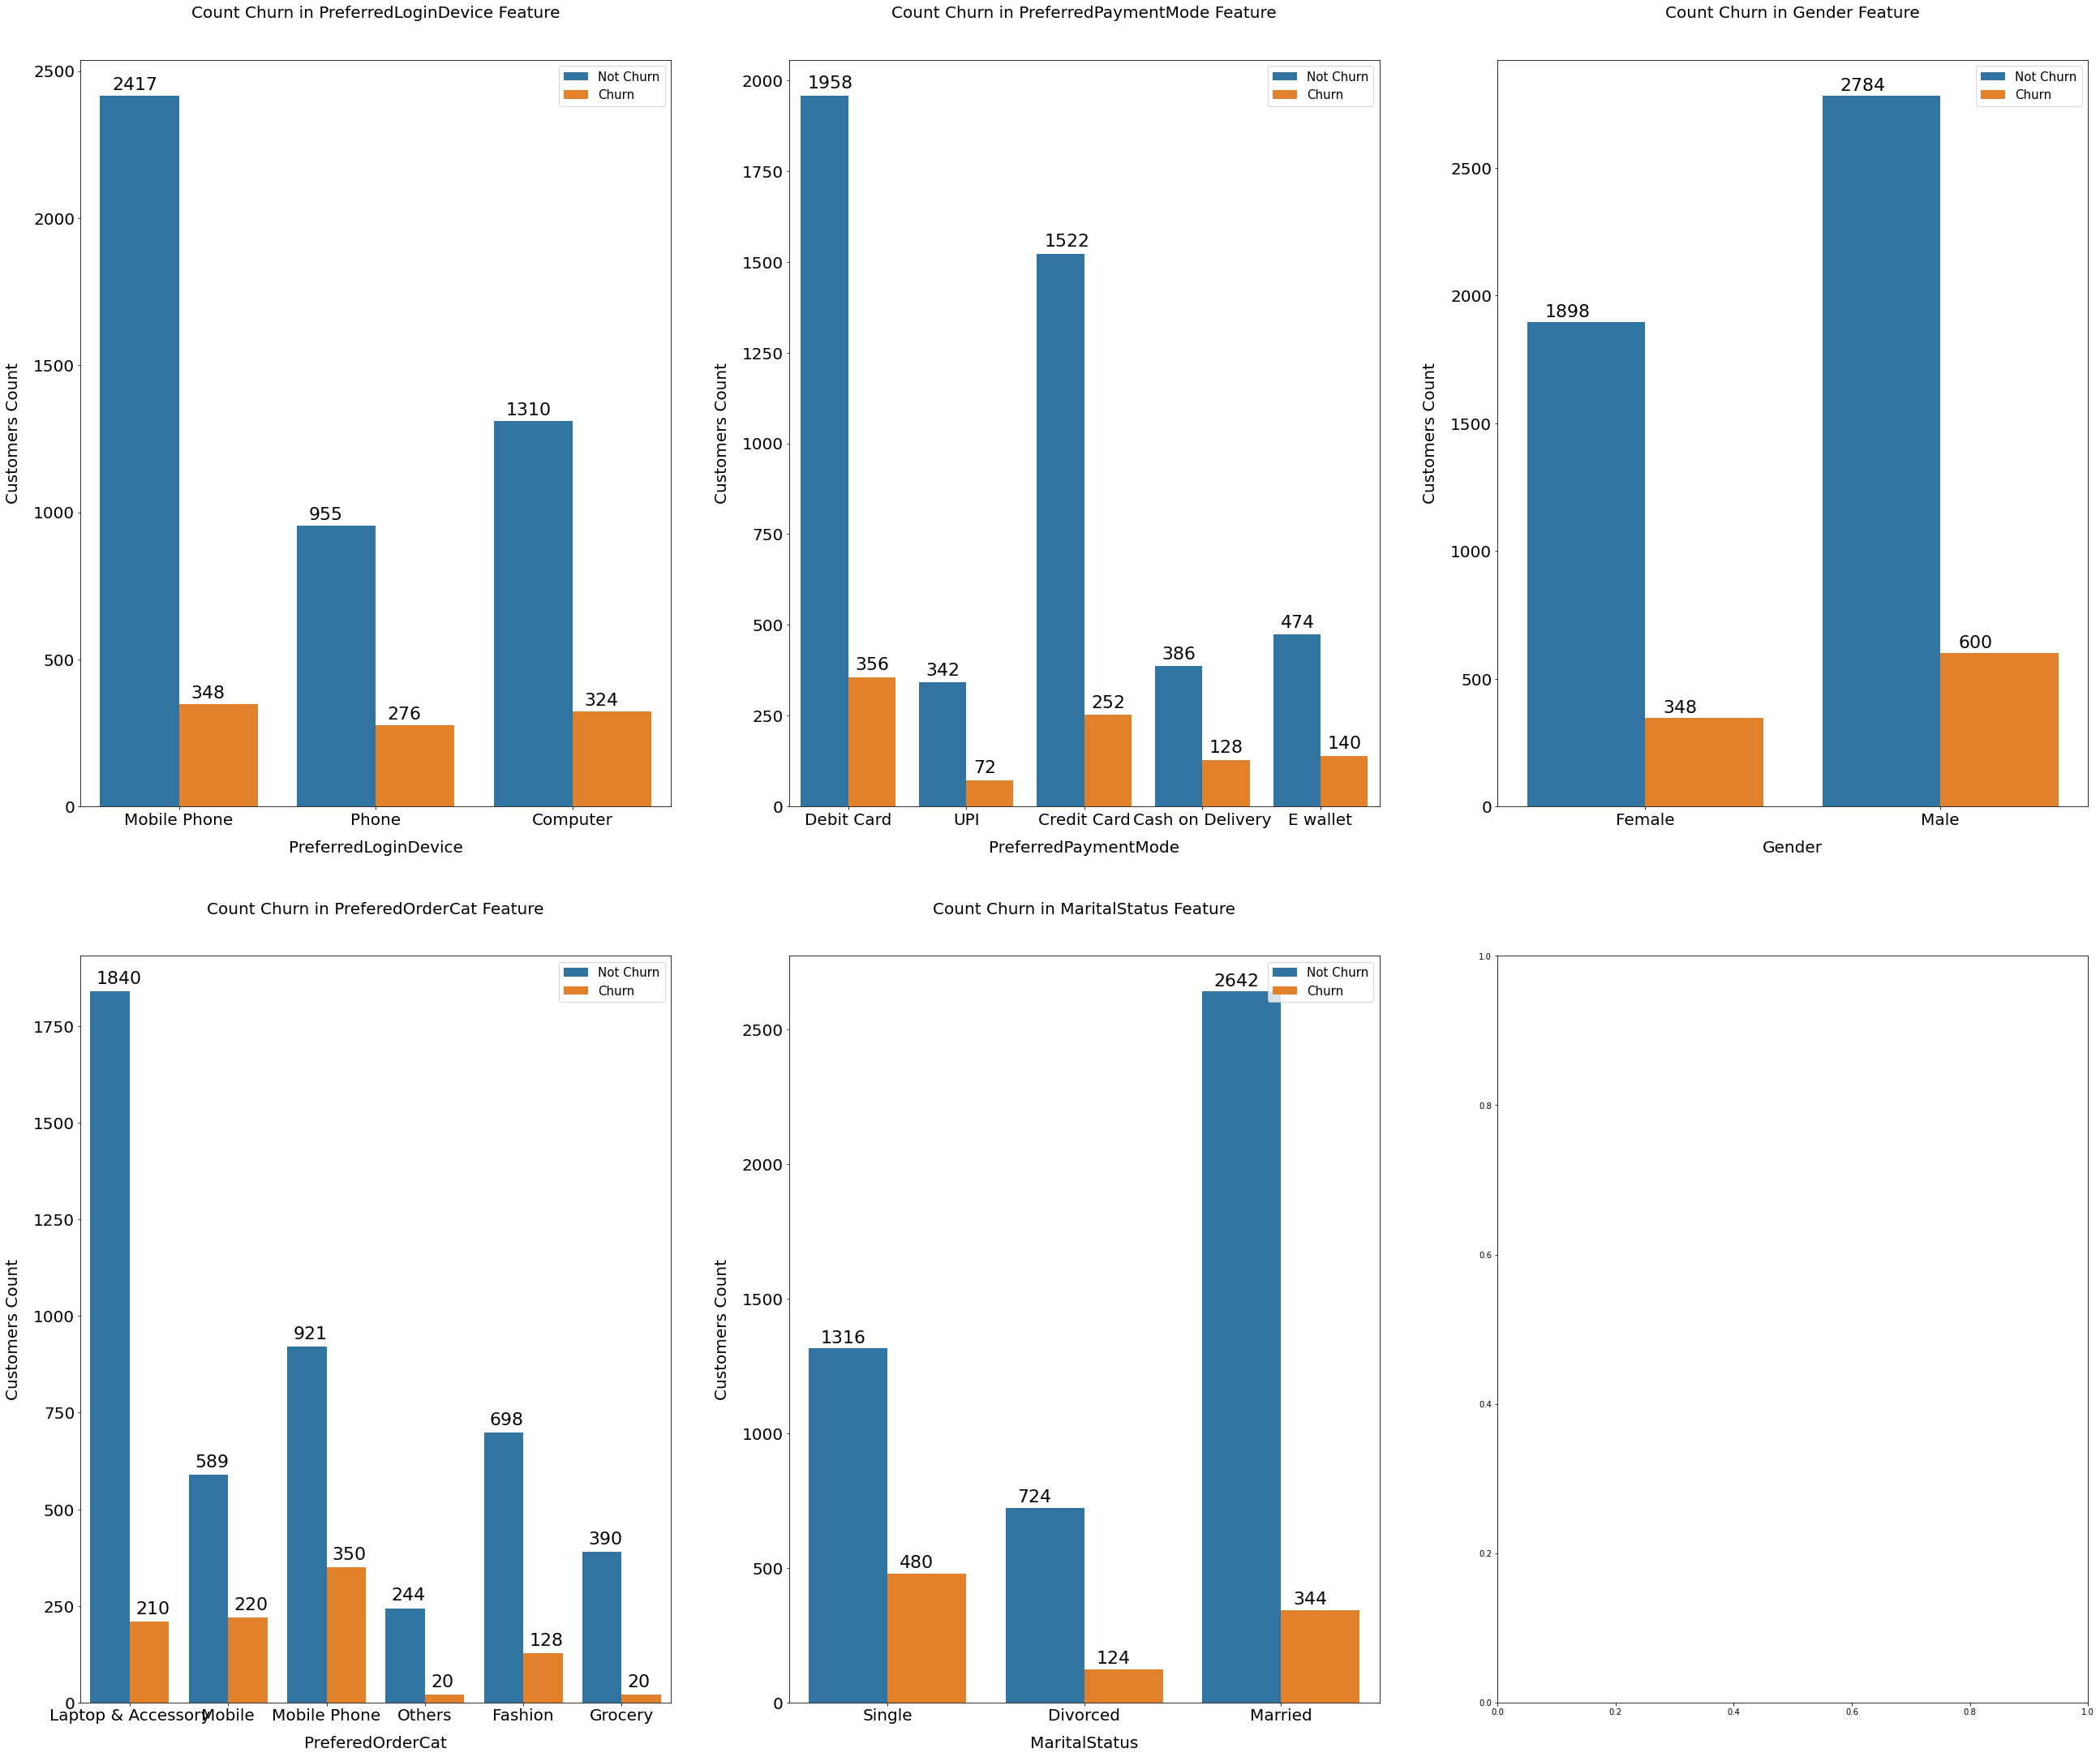

In [13]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, figsize = (25, 25))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_var[:6], 1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(x = feature, hue = 'Churn', data = churn)

    plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
    plt.ylabel('Customers Count', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis = 'y', labelsize = 20)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.06, p.get_height()+20), size = 22)

    plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 15})
    plt.title('Count Churn in {} Feature'.format(feature), size = 20, y = 1.05)

plt.show()

Dari grafik grafik di atas, dapat diperoleh insight insight berikut

1. Customer yang prefer log in menggunakan phone dan computer cenderung untuk mengalami churn dibandingkan dengan yang lainnya.
2. Customer yang prefer payment method dengan Cash on Delivery dan E-Wallet cenderung untuk mengalami churn dibandingkan dengan payment method lainnya.
3. Customer wanita lebih cenderung untuk mengalami churn dibandingkan customer pria.
4. Customer yang prefer order kategori Mobile dan Mobile Phone cenderung untuk mengalami churn dibandingkan dengan kategori-kategori lainnya.
5. Customer yang masih Single lebih cenderung untuk mengalami churn dibandingkan dengan yang sudah menikah ataupun sudah bercerai.

## Base: Gender

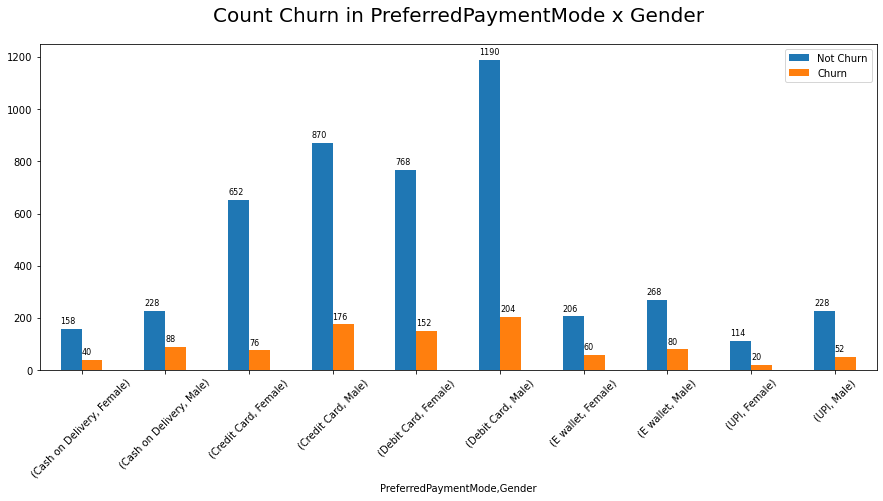

In [14]:
ax = churn.groupby(['Churn','PreferredPaymentMode']).Gender.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in PreferredPaymentMode x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

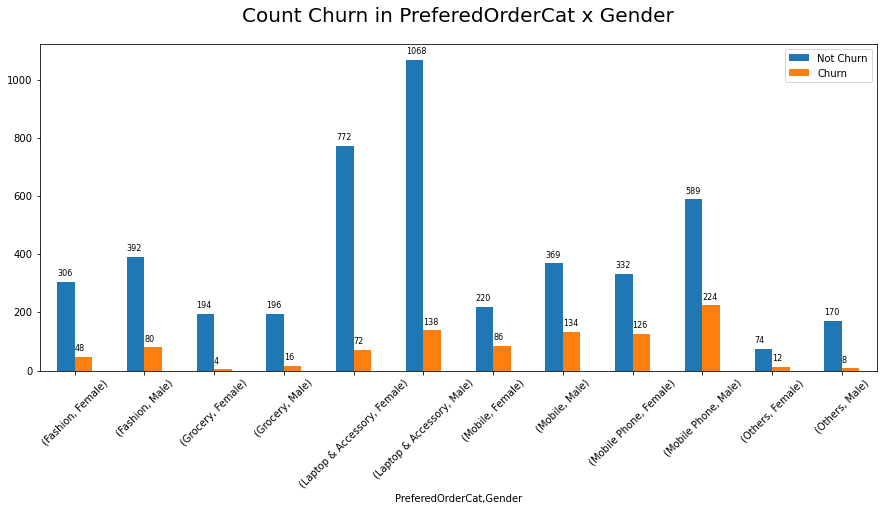

In [15]:
ax = churn.groupby(['Churn','PreferedOrderCat']).Gender.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in PreferedOrderCat x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

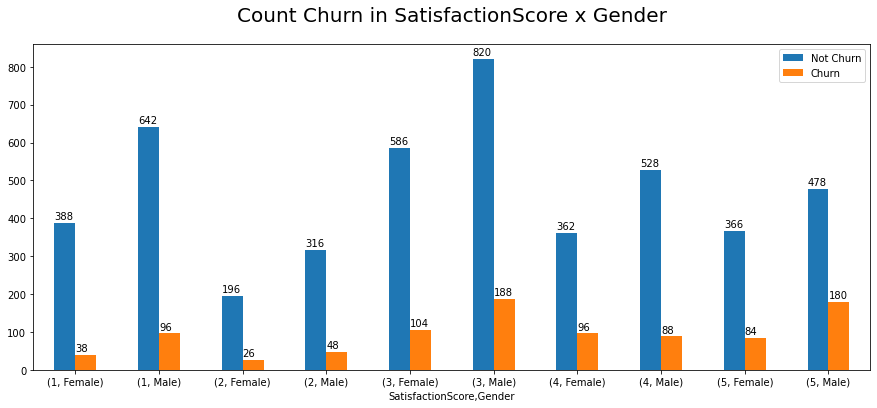

In [16]:
ax = churn.groupby(['Churn','SatisfactionScore']).Gender.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 10)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in SatisfactionScore x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

Dari grafik di atas, dapat diperoleh insight bahwa semakin besar skor kepuasan yang diberikan oleh customer nya (baik pria maupun wanita), maka semakin cenderung untuk mengalami churn.

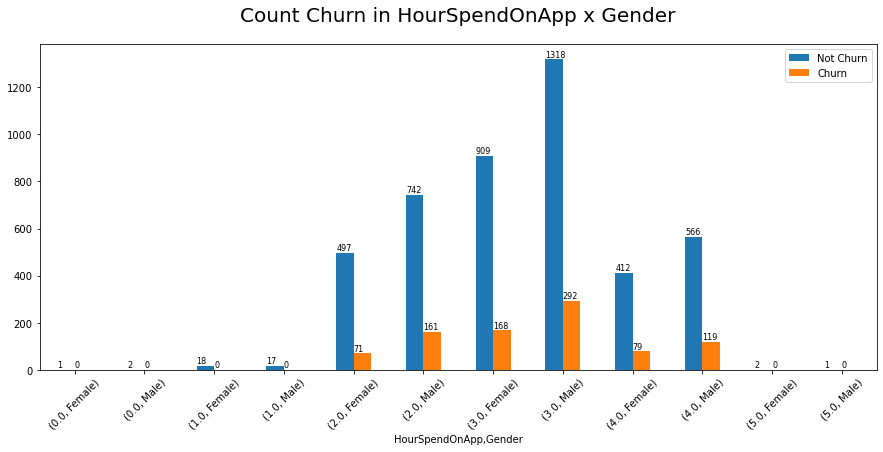

In [17]:
ax = churn.groupby(['Churn','HourSpendOnApp']).Gender.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in HourSpendOnApp x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

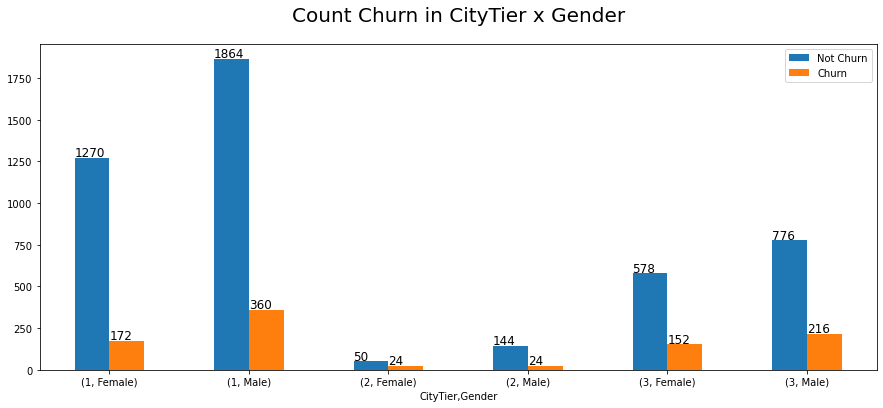

In [18]:
ax = churn.groupby(['Churn','CityTier']).Gender.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 12)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in CityTier x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

Dari grafik di atas, dapat diperoleh insight bahwa customer yang tinggal di City Tier 3 (baik pria maupun wanita) lebih cenderung untuk mengalami churn dibandingkan dengan customer yang tinggal di City Tier lainnya.

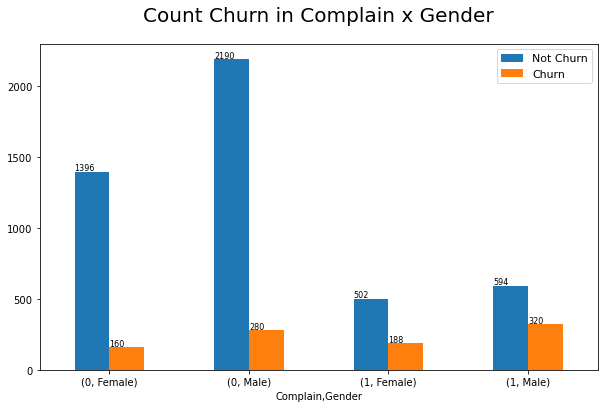

In [19]:
ax = churn.groupby(['Churn','Complain']).Gender.value_counts().unstack(0).plot.bar(figsize = (10,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 11})
plt.title('Count Churn in Complain x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

Dari grafik di atas, dapat diperoleh insight bahwa customer yang pernah memberikan Complain (baik pria maupun wanita) lebih cenderung untuk mengalami churn dibandingkan dengan customer yang tidak pernah memberikan Complain.

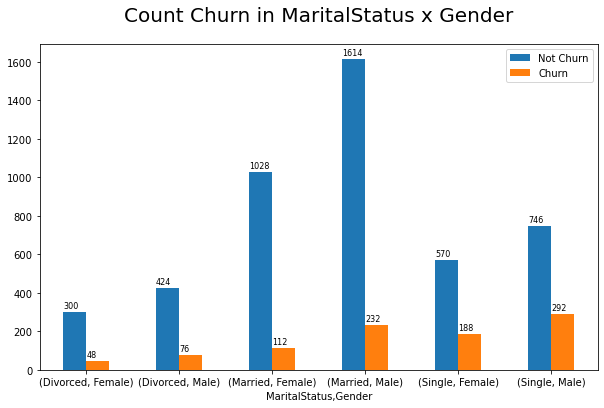

In [20]:
ax = churn.groupby(['Churn','MaritalStatus']).Gender.value_counts().unstack(0).plot.bar(figsize = (10,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in MaritalStatus x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

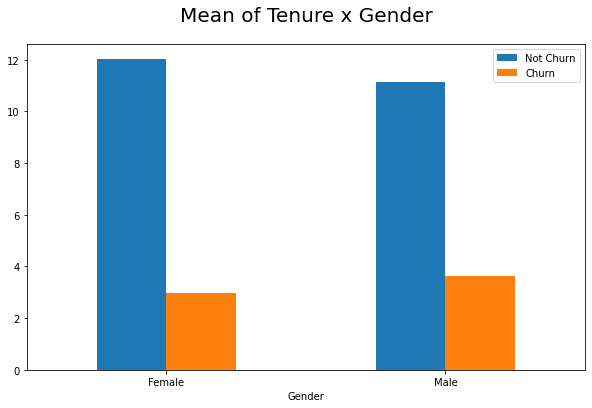

In [21]:
ax = churn.groupby(['Churn', 'Gender']).Tenure.mean().unstack(0).plot.bar(figsize = (10,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Mean of Tenure x Gender', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

Dari grafik di atas, dapat didapatkan insight bahwa customer dengan Tenure yang lebih sedikit secara rata-rata lebih cenderung untuk mengalami churn dibandingkan dengan customer yang memiliki Tenure lebih besar.

## Base: Marital Status

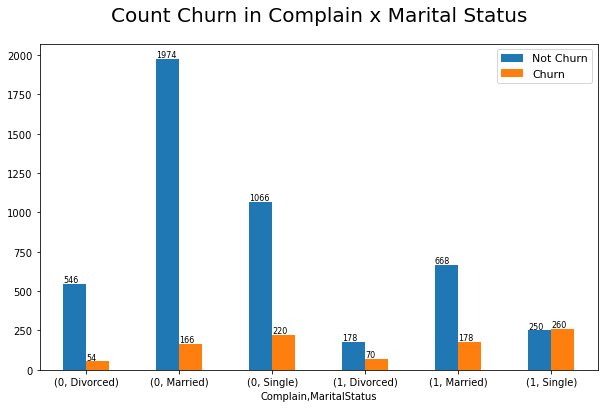

In [22]:
ax = churn.groupby(['Churn','Complain']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (10,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 11})
plt.title('Count Churn in Complain x Marital Status', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

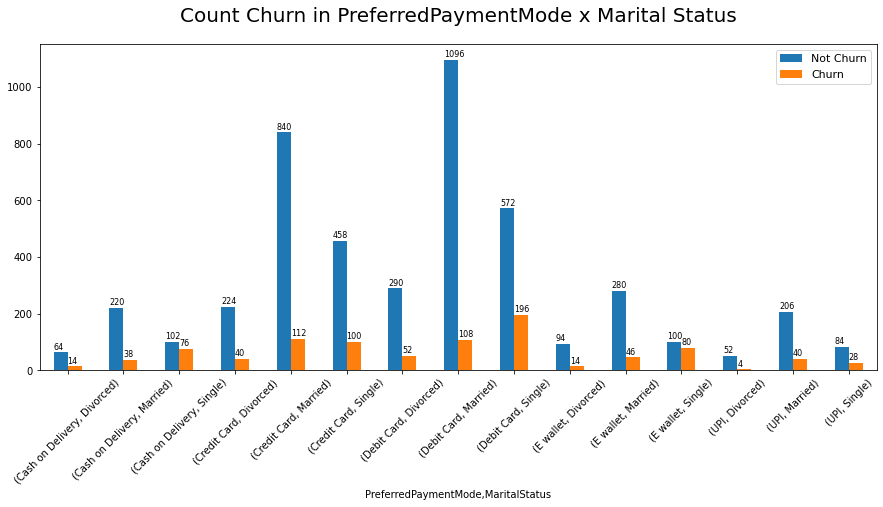

In [23]:
ax = churn.groupby(['Churn','PreferredPaymentMode']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 11})
plt.title('Count Churn in PreferredPaymentMode x Marital Status', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

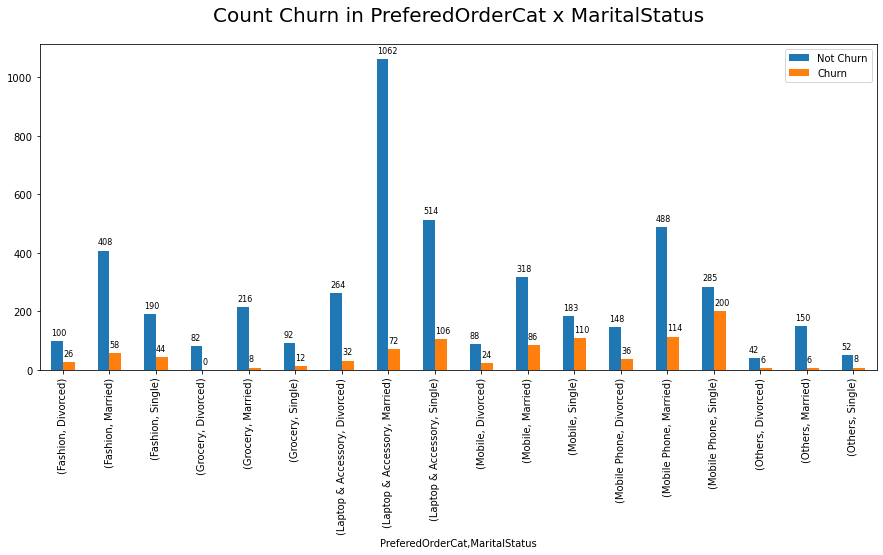

In [24]:
ax = churn.groupby(['Churn','PreferedOrderCat']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in PreferedOrderCat x MaritalStatus', size = 20, y = 1.05)
#plt.xticks(rotation = 45)
plt.show()

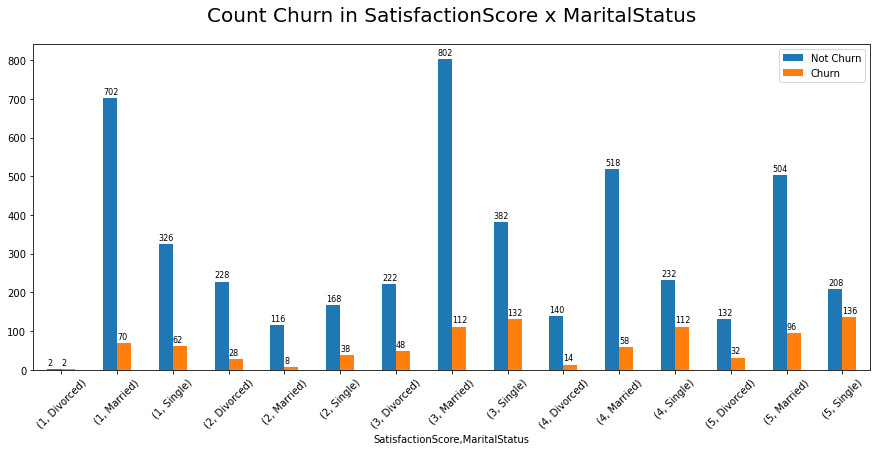

In [25]:
ax = churn.groupby(['Churn','SatisfactionScore']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in SatisfactionScore x MaritalStatus', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

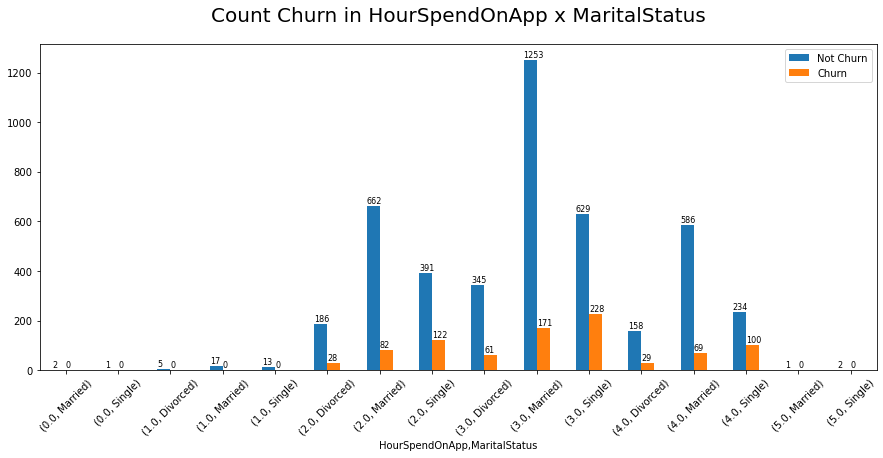

In [26]:
ax = churn.groupby(['Churn','HourSpendOnApp']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Count Churn in HourSpendOnApp x MaritalStatus', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

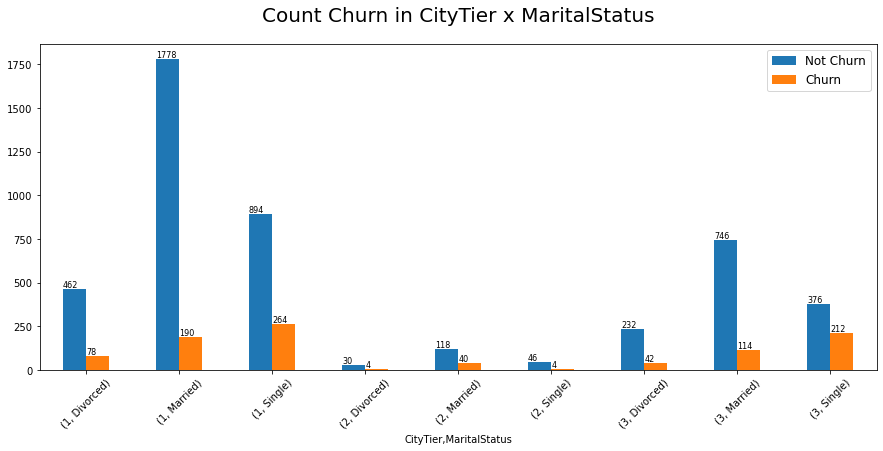

In [27]:
ax = churn.groupby(['Churn','CityTier']).MaritalStatus.value_counts().unstack(0).plot.bar(figsize = (15,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+10), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 12})
plt.title('Count Churn in CityTier x MaritalStatus', size = 20, y = 1.05)
plt.xticks(rotation = 45)
plt.show()

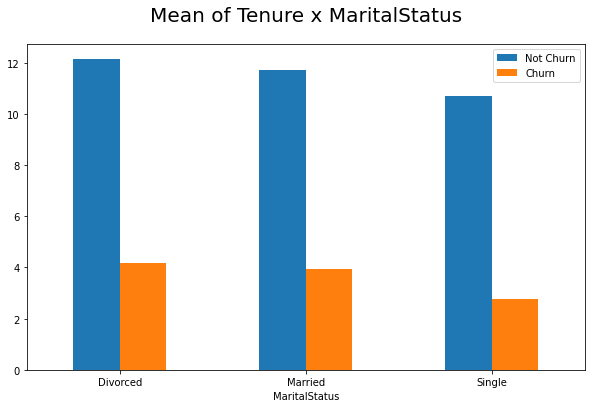

In [28]:
ax = churn.groupby(['Churn', 'MaritalStatus']).Tenure.mean().unstack(0).plot.bar(figsize = (10,6))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()+20), size = 8)
    
plt.legend(['Not Churn', 'Churn'], loc = 'upper right', prop = {'size': 10})
plt.title('Mean of Tenure x MaritalStatus', size = 20, y = 1.05)
plt.xticks(rotation = 0)
plt.show()

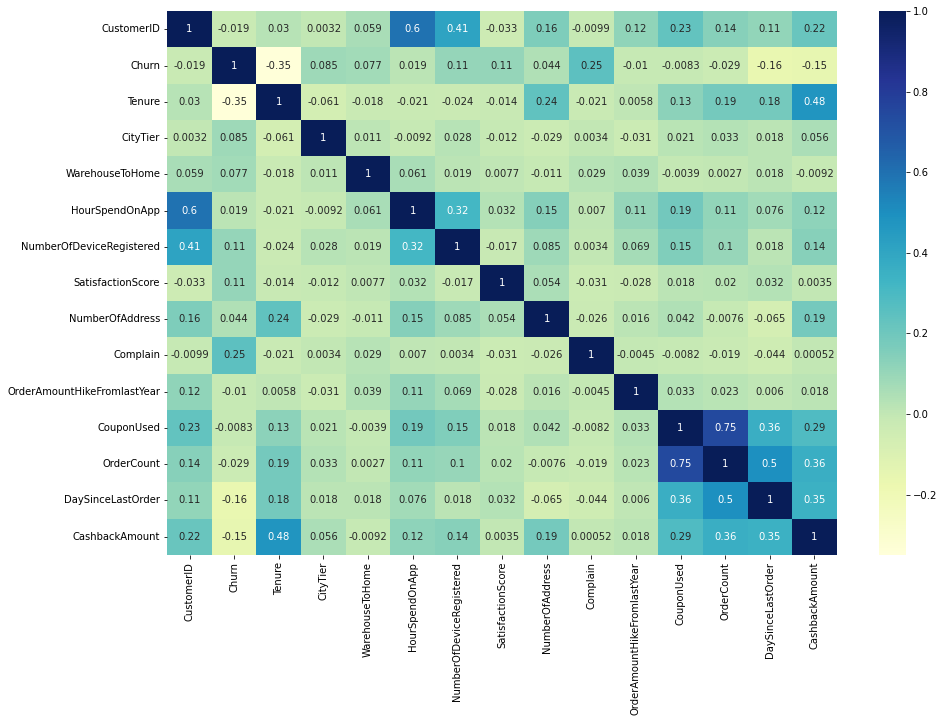

In [29]:
plt.figure(figsize = (15, 10))
sns.heatmap(churn.corr(), annot=True, cmap = 'YlGnBu')
plt.show()

# Data Cleaning and Preprocessing

In [30]:
churn

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [31]:
churn.drop(['CustomerID'], axis = 1, inplace = True)
churn

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,Credit Card,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [32]:
churn_class = churn.copy()

,column_name,total_missing,percent_missing
0,Churn,0,0.000000
1,Complain,0,0.000000
2,NumberOfAddress,0,0.000000
3,MaritalStatus,0,0.000000
4,SatisfactionScore,0,0.000000
5,NumberOfDeviceRegistered,0,0.000000
6,PreferedOrderCat,0,0.000000
7,PreferredPaymentMode,0,0.000000
8,CityTier,0,0.000000
9,PreferredLoginDevice,0,0.000000


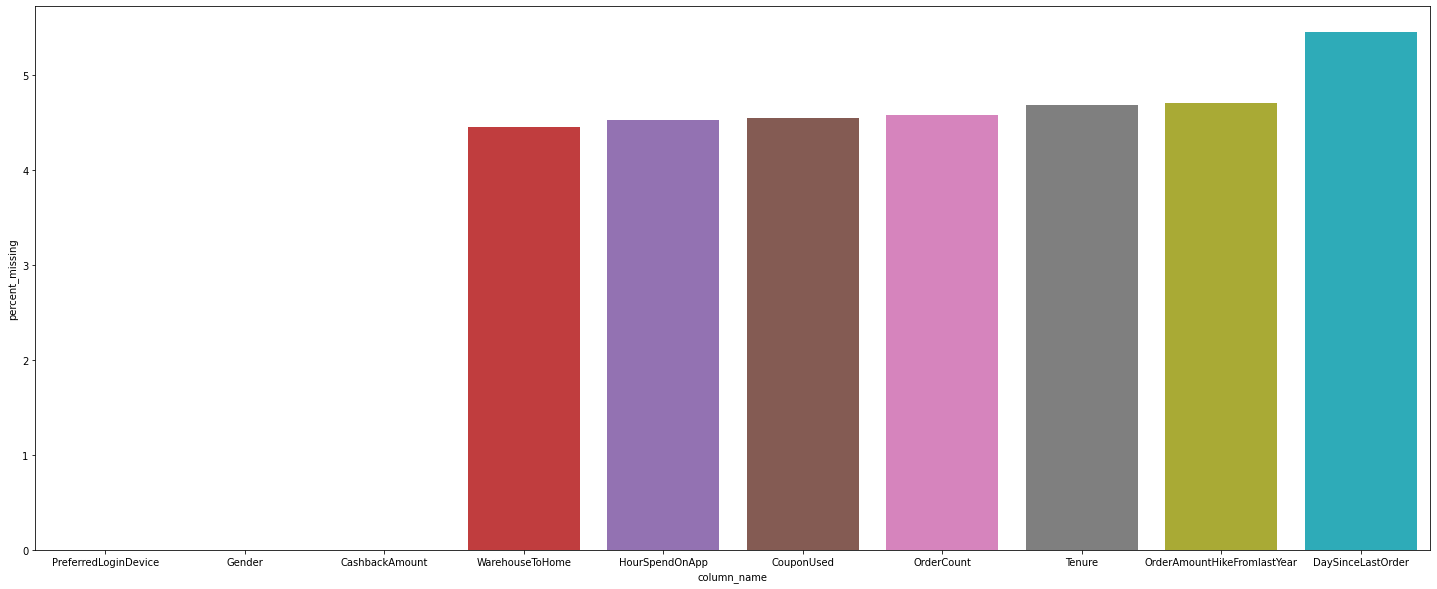

In [33]:
#Check Missing Value

def get_percentMissing(df1):
    percent_missing = df1.isnull().sum() * 100 / len(df1)
    tot_missing = df1.isnull().sum() 
    missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                     'total_missing': tot_missing,
                                     'percent_missing': percent_missing})

    missing_value_df.sort_values('percent_missing',inplace=True)
    a4_dims = (25, 10)
    # df = mylib.load_data()
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.barplot(x = 'column_name', y = 'percent_missing',ax=ax, data=missing_value_df[-10:],)

    
    return missing_value_df.reset_index(drop = True)

get_percentMissing(churn_class)

In [34]:
churn.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [35]:
# Handle missing values
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer_median = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

churn_class['WarehouseToHome'] = imputer_median.fit_transform(churn_class['WarehouseToHome'].to_numpy().reshape(-1,1))
churn_class['HourSpendOnApp'] = imputer_median.fit_transform(churn_class['HourSpendOnApp'].to_numpy().reshape(-1,1))
churn_class['CouponUsed'] = imputer_mode.fit_transform(churn_class['CouponUsed'].to_numpy().reshape(-1,1))
churn_class['OrderCount'] = imputer_mode.fit_transform(churn_class['OrderCount'].to_numpy().reshape(-1,1))
churn_class['Tenure'] = imputer_median.fit_transform(churn_class['Tenure'].to_numpy().reshape(-1,1))
churn_class['OrderAmountHikeFromlastYear'] = imputer_median.fit_transform(churn_class['OrderAmountHikeFromlastYear'].to_numpy().reshape(-1,1))
churn_class['DaySinceLastOrder'] = imputer_mode.fit_transform(churn_class['DaySinceLastOrder'].to_numpy().reshape(-1,1))

churn_class.isnull().values.any()

False

In [36]:
#Handling Outliers

from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(churn_class)}')

filtered_entries = np.array([True] * len(churn_class))
num_var = churn_class.select_dtypes(exclude = ['object']).columns.tolist()
for col in num_var:
    zscore = abs(stats.zscore(churn_class[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
churn_class = churn_class[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(churn_class)}')

Jumlah baris sebelum memfilter outlier: 5630
Jumlah baris setelah memfilter outlier: 5350


# Feature Engineering

In [37]:
churn_class_encoded = pd.get_dummies(churn_class.drop(['Churn'], axis=1))
churn_class_encoded['Churn'] = churn_class['Churn']
churn_class_encoded.head(12)

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Churn
0,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1
1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1
2,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1
4,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
5,0.0,1,22.0,3.0,5,5,2,1,22.0,4.0,6.0,7.0,139.19,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1
6,9.0,3,11.0,2.0,3,2,4,0,14.0,0.0,1.0,0.0,120.86,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
7,9.0,1,6.0,3.0,3,2,3,1,16.0,2.0,2.0,0.0,122.93,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
8,13.0,3,9.0,3.0,4,3,2,1,14.0,0.0,1.0,2.0,126.83,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
9,9.0,1,31.0,2.0,5,3,2,0,12.0,1.0,1.0,1.0,122.93,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1


In [38]:
churn_class_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5350 entries, 0 to 5629
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 5350 non-null   float64
 1   CityTier                               5350 non-null   int64  
 2   WarehouseToHome                        5350 non-null   float64
 3   HourSpendOnApp                         5350 non-null   float64
 4   NumberOfDeviceRegistered               5350 non-null   int64  
 5   SatisfactionScore                      5350 non-null   int64  
 6   NumberOfAddress                        5350 non-null   int64  
 7   Complain                               5350 non-null   int64  
 8   OrderAmountHikeFromlastYear            5350 non-null   float64
 9   CouponUsed                             5350 non-null   float64
 10  OrderCount                             5350 non-null   float64
 11  DayS

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
import shap

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.4f" % auc(fpr, tpr))

def built_in_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def shap_feature_importance(model_input, X):
    explainer = shap.TreeExplainer(model_input)
    shap_values = explainer.shap_values(X)
    shap.summary_plot(shap_values, X, plot_type="bar")
    print("="*30)
    shap.summary_plot(shap_values, X)

# Split Dataset

In [40]:
from sklearn.model_selection import train_test_split 

X = churn_class_encoded.drop(['Churn'], axis = 1)
y = churn_class_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.20)

# Handling Imbalance Dataset

<AxesSubplot:title={'center':'Count (Churn)'}>

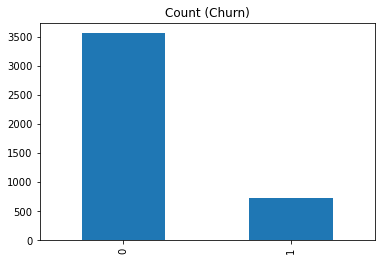

In [41]:
y_train.value_counts().plot(kind = 'bar', title='Count (Churn)')

After Sampling Data:
0    3555
1    3555
Name: Churn, dtype: int64


<AxesSubplot:title={'center':'Count (Churn)'}>

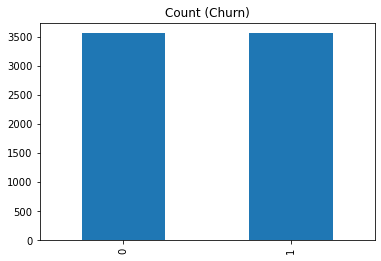

In [42]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print('After Sampling Data:')
print(y_train.value_counts())

y_train.value_counts().plot(kind = 'bar', title='Count (Churn)')

# Standardization

In [43]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling: Logistic Regression

In [44]:
#Train Model using Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create an instance of the model. 
logreg = LogisticRegression() 

# Training the model. 
logreg.fit(X_train,y_train) 

# Do prediction. 
y_pred = logreg.predict(X_test)

print(eval_classification(logreg, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.8738
Precision (Test Set): 0.6512
Recall (Test Set): 0.5989
F1-Score (Test Set): 0.6240
AUC: 0.7655
None


In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[823  60]
 [ 75 112]]

True Positives(TP) =  823

True Negatives(TN) =  112

False Positives(FP) =  60

False Negatives(FN) =  75


<AxesSubplot:>

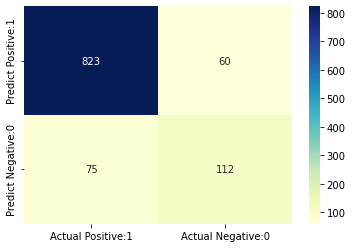

In [46]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       883
           1       0.65      0.60      0.62       187

    accuracy                           0.87      1070
   macro avg       0.78      0.77      0.77      1070
weighted avg       0.87      0.87      0.87      1070



In [48]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.8738
Classification Error : 0.1262
Precision : 0.9320
Recall or Sensitivity or TPR : 0.9165


In [49]:
#True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

#False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

#Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.9165
False Positive Rate : 0.3488
Specificity : 0.6512


# Threshold

In [50]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.7226331 , 0.2773669 ],
       [0.94495133, 0.05504867],
       [0.98056745, 0.01943255],
       [0.91565568, 0.08434432],
       [0.90417456, 0.09582544],
       [0.4243712 , 0.5756288 ],
       [0.66189916, 0.33810084],
       [0.77207576, 0.22792424],
       [0.36209594, 0.63790406],
       [0.42496427, 0.57503573]])

In [51]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns = ['Prob of - Not Churn tomorrow (1)', 'Prob of - Churn (0)'])
y_pred_prob_df

,Prob of - Not Churn tomorrow (1),Prob of - Churn (0)
0,0.722633,0.277367
1,0.944951,0.055049
2,0.980567,0.019433
3,0.915656,0.084344
4,0.904175,0.095825
5,0.424371,0.575629
6,0.661899,0.338101
7,0.772076,0.227924
8,0.362096,0.637904
9,0.424964,0.575036


In [52]:
#store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

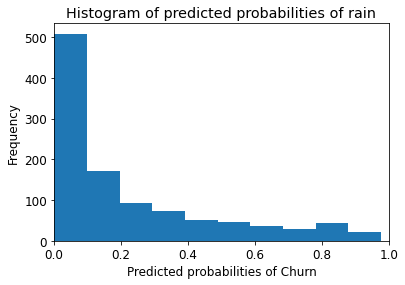

In [53]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

In [54]:
from sklearn.preprocessing import binarize

for i in range(1,7):
    cm1=0
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,  threshold=i/10)
    
    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    # print(y_test)
    # print(y_pred2)
    
    cm1 = confusion_matrix(y_test, y_pred2)    
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[501 382]
 [ 15 172]] 

 with 673 correct predictions,  

 382 Type I errors( False Positives),  

 15 Type II errors( False Negatives),  

 Accuracy score:  0.6289719626168224 

 Sensitivity:  0.9197860962566845 

 Specificity:  0.5673839184597962 



With 0.2 threshold the Confusion Matrix is  

 [[657 226]
 [ 29 158]] 

 with 815 correct predictions,  

 226 Type I errors( False Positives),  

 29 Type II errors( False Negatives),  

 Accuracy score:  0.7616822429906542 

 Sensitivity:  0.8449197860962567 

 Specificity:  0.7440543601359003 



With 0.3 threshold the Confusion Matrix is  

 [[733 150]
 [ 43 144]] 

 with 877 correct predictions,  

 150 Type I errors( False Positives),  

 43 Type II errors( False Negatives),  

 Accuracy score:  0.819626168224299 

 Sensitivity:  0.7700534759358288 

 Specificity:  0.8301245753114382 



With 0.4 threshold the Confusion Matrix is  

 [[791  92]
 [ 57 130]] 

 with 921 correct predicti

In [55]:
y_pred1 = logreg.predict_proba(X_test)[:,1]
y_pred1 = y_pred1.reshape(-1,1)
y_pred2 = binarize(y_pred1, threshold = 0.5)

y_pred2[0:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]])

# ROC AUC (Logistic Regression)

In [56]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7655


In [57]:
#Using AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier

# Create an instance of the model. 
ada = AdaBoostClassifier(n_estimators = 100, random_state = 0)

# Training the model. 
ada.fit(X_train, y_train)

# Do prediction. 
y_pred = ada.predict(X_test)

print(eval_classification(ada,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.8860
Precision (Test Set): 0.6776
Recall (Test Set): 0.6631
F1-Score (Test Set): 0.6703
AUC: 0.7981
None


In [58]:
#Using Nearest Centroid

from sklearn.neighbors import NearestCentroid

# Create an instance of the model. 
nc = NearestCentroid()

# Training the model. 
nc.fit(X_train, y_train)

# Do prediction. 
y_pred = nc.predict(X_test)

print(eval_classification(nc,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.7757
Precision (Test Set): 0.4108
Recall (Test Set): 0.6524
F1-Score (Test Set): 0.5041
AUC: 0.7271
None


In [59]:
#Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

# Create an instance of the model. 
dt = DecisionTreeClassifier()

# Training the model. 
dt.fit(X_train, y_train)

# Do prediction. 
y_pred = dt.predict(X_test)

print(eval_classification(dt,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.9047
Precision (Test Set): 0.7073
Recall (Test Set): 0.7754
F1-Score (Test Set): 0.7398
AUC: 0.8537
None


In [60]:
#Using Random Forest

from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model. 
rf = RandomForestClassifier(n_estimators=750)

# Training the model. 
rf.fit(X_train, y_train)

# Do prediction. 
y_pred = nc.predict(X_test)

print(eval_classification(rf,y_pred,X_train,y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.7757
Precision (Test Set): 0.4108
Recall (Test Set): 0.6524
F1-Score (Test Set): 0.5041
AUC: 0.7271
None


# Modelling : XGBoost (Model yang Terbaik)

In [61]:
from xgboost import XGBClassifier

# Create an instance of the model. 
xg = XGBClassifier(random_state = 50)

# Training the model. 
xg.fit(X_train, y_train)

# Do prediction. 
y_pred = xg.predict(X_test)

print(eval_classification(xg, y_pred, X_train, y_train, X_test, y_test))
print("="*25)

Accuracy (Test Set): 0.9710
Precision (Test Set): 0.9239
Recall (Test Set): 0.9091
F1-Score (Test Set): 0.9164
AUC: 0.9466
None


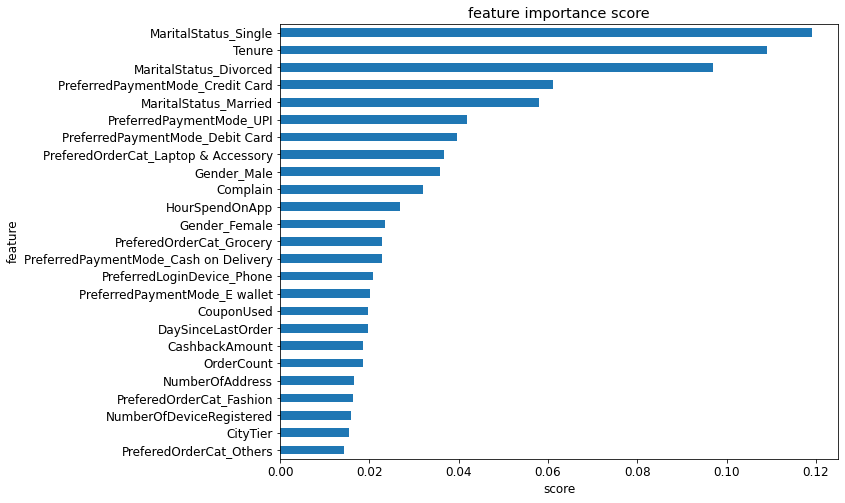

In [62]:
built_in_feature_importance(xg)

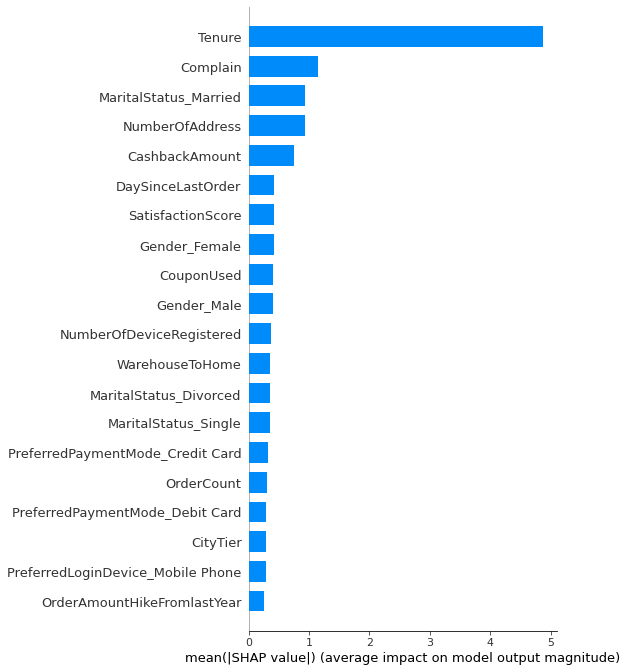

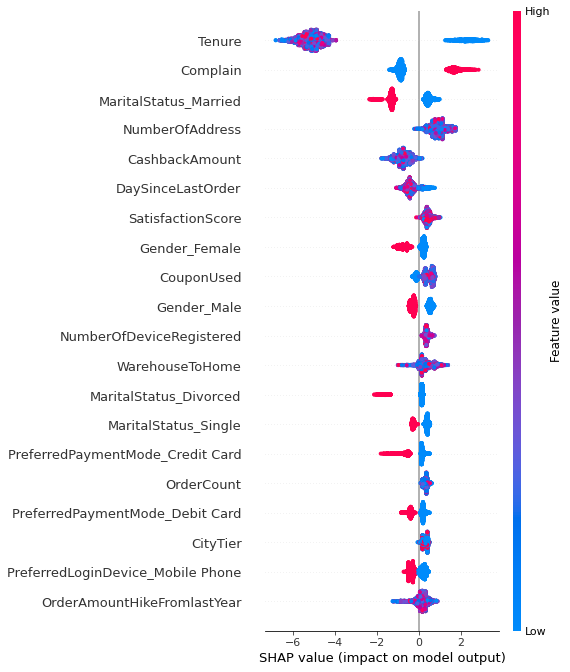

In [63]:
shap_feature_importance(xg, X)

In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[869  14]
 [ 17 170]]

True Positives(TP) =  869

True Negatives(TN) =  170

False Positives(FP) =  14

False Negatives(FN) =  17


<AxesSubplot:>

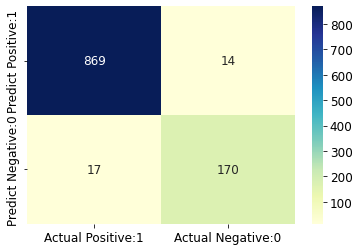

In [65]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'], 
                                 index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       883
           1       0.92      0.91      0.92       187

    accuracy                           0.97      1070
   macro avg       0.95      0.95      0.95      1070
weighted avg       0.97      0.97      0.97      1070



In [67]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy : {0:0.4f}'.format(accuracy))

class_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification Error : {0:0.4f}'.format(class_error))

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)
print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Classification accuracy : 0.9710
Classification Error : 0.0290
Precision : 0.9841
Recall or Sensitivity or TPR : 0.9808


In [68]:
#True Positive Rate (TPR)
TPR = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(TPR))

#False Positive Rate (FPR)
FPR = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(FPR))

#Spacificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

True Positive Rate : 0.9808
False Positive Rate : 0.0761
Specificity : 0.9239


# Threshold

In [69]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = xg.predict_proba(X_test)[0:10]
y_pred_prob

array([[3.9152741e-02, 9.6084726e-01],
       [9.9931198e-01, 6.8801607e-04],
       [9.9968463e-01, 3.1539210e-04],
       [9.9967122e-01, 3.2880018e-04],
       [9.9937302e-01, 6.2696962e-04],
       [1.0289967e-02, 9.8971003e-01],
       [9.6560687e-01, 3.4393124e-02],
       [9.9619120e-01, 3.8088034e-03],
       [9.6698529e-01, 3.3014700e-02],
       [8.5408980e-01, 1.4591022e-01]], dtype=float32)

In [70]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['Prob of - Not Churn tomorrow (1)', 'Prob of - Churn (0)'])
y_pred_prob_df

,Prob of - Not Churn tomorrow (1),Prob of - Churn (0)
0,0.039153,0.960847
1,0.999312,0.000688
2,0.999685,0.000315
3,0.999671,0.000329
4,0.999373,0.000627
5,0.010290,0.989710
6,0.965607,0.034393
7,0.996191,0.003809
8,0.966985,0.033015
9,0.854090,0.145910


In [71]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = xg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

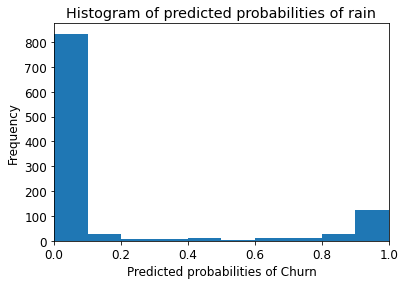

In [72]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12

# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)

# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

In [73]:
from sklearn.preprocessing import binarize

for i in range(1,9):
    cm1=0
    y_pred1 = xg.predict_proba(X_test)[:,1]
    y_pred1 = y_pred1.reshape(-1,1)
    y_pred2 = binarize(y_pred1,  threshold = i/10)
    
    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    # print(y_test)
    # print(y_pred2)
    
    cm1 = confusion_matrix(y_test, y_pred2)    
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[831  52]
 [  3 184]] 

 with 1015 correct predictions,  

 52 Type I errors( False Positives),  

 3 Type II errors( False Negatives),  

 Accuracy score:  0.9485981308411215 

 Sensitivity:  0.983957219251337 

 Specificity:  0.9411098527746319 



With 0.2 threshold the Confusion Matrix is  

 [[856  27]
 [  5 182]] 

 with 1038 correct predictions,  

 27 Type I errors( False Positives),  

 5 Type II errors( False Negatives),  

 Accuracy score:  0.9700934579439252 

 Sensitivity:  0.9732620320855615 

 Specificity:  0.9694224235560589 



With 0.3 threshold the Confusion Matrix is  

 [[864  19]
 [  6 181]] 

 with 1045 correct predictions,  

 19 Type I errors( False Positives),  

 6 Type II errors( False Negatives),  

 Accuracy score:  0.9766355140186916 

 Sensitivity:  0.9679144385026738 

 Specificity:  0.9784824462061155 



With 0.4 threshold the Confusion Matrix is  

 [[867  16]
 [  9 178]] 

 with 1045 correct prediction

In [74]:
y_pred1 = xg.predict_proba(X_test)[:,1]
y_pred1 = y_pred1.reshape(-1,1)
y_pred2 = binarize(y_pred1, threshold = 0.5)

y_pred2[0:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

# ROC AUC (XGBoost)

In [75]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9466


Dengan menggunakan model XGBoost, diperoleh nilai ROC AUC yang paling besar (mendekati 95%) dibandingkan dengan model model lainnya, sehingga dapat disimpulkan bahwa model XGBoost adalah model terbaik yang dapat digunakan untuk memprediksi Churn dari customer nya.

=========================================================================================================================

Berikut adalah kesimpulan dari hasil Exploratory Data Analysis yang telah dilakukan pada tahap-tahap sebelumnya:

1. Data terlihat valid dan tidak ada kecacatan. Namun masih ada data-data yang kosong/hilang sehingga harus diurus ketika preprocessing.
2. Ada beberapa distribusi yang sedikit skewed. Hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal.
3. Beberapa feature memiliki korelasi yang jelas dengan target, mereka akan dipakai.

Hasil insight penting yang ditemukan antara lain:

1. Customer yang prefer log in menggunakan phone dan computer cenderung untuk mengalami churn dibandingkan dengan yang lainnya.
2. Customer yang prefer payment method dengan Cash on Delivery dan E-Wallet cenderung untuk mengalami churn dibandingkan dengan payment method lainnya.
3. Customer wanita lebih cenderung untuk mengalami churn dibandingkan customer pria.
4. Customer yang prefer order kategori Mobile dan Mobile Phone cenderung untuk mengalami churn dibandingkan dengan kategori-kategori lainnya.
5. Customer yang masih Single lebih cenderung untuk mengalami churn dibandingkan dengan yang sudah menikah ataupun sudah bercerai.
6. Semakin besar nilai skor kepuasan terhadap pelayanan yang diberikan oleh customer maka customer tersebut akan semakin cenderung untuk mengalami churn.
7. Customer yang tinggal di CityTier yang lebih tinggi akan lebih cenderung untuk mengalami churn.
8. Customer yang pernah memberikan Complain lebih cenderung untuk mengalami churn dibandingkan dengan customer yang tidak pernah memberikan Complain
9. Customer dengan Tenure yang lebih kecil lebih cenderung untuk mengalami churn dibandingkan dengan customer yang memiliki Tenure lebih besar.

Daftar Preprocessing yang dilakukan:

1. Membersihkan dan menambal data-data yang kosong.
2. Menghilangkan data yang redundan.
3. Mengatasi outlier dengan menggunakan zscore.
4. Melakukan normalisasi data untuk mempermudah learning.
5. Melakukan feature encoding dan mengatasi class imbalance.

Daftar Model yang telah digunakan sebagai eksperimen beserta range nilai ROC AUC yang dihasilkan:

1. Logistic Regression (76%-77%)
2. AdaBoost Classifier (78%-80%)
3. Nearest Centroid (71%-74%)
4. Decision Tree (84%-86%)
5. Random Forest (71%-73%)
6. XGBoost Classifier (93%-95%) --> Model terbaik yang digunakan untuk prediksi